### Путем исследования базы imdb по фильмам с 1960 по 2017 годы необходимо получить ответ на вопрос является ли высокий бюджет существенным элементом для обеспечения прибыльности кинокартины.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Подготовка данных

In [3]:
df = pd.read_csv('movies_metadata.csv', dtype='unicode')

In [4]:
columns_ = list(df.columns.values)
ex_columns = ['budget', 'revenue', 'title', 'release_date']
dr_columns_ = [i for i in columns_ if not(i in ex_columns)]
df = df.drop(dr_columns_, axis=1)

In [5]:
df.loc[df['budget'].str.len() > 15, 'budget'] = 0
df['budget'] = df['budget'].astype(float)
df['revenue'] = df['revenue'].astype(float)
df.loc[df['budget'] < 10000, 'budget'] = 0
df.loc[df['revenue'] < 10000, 'revenue'] = 0

In [6]:
df['title'].replace('', np.nan, inplace=True)
df['revenue'].replace(0, np.nan, inplace=True)
df['budget'].replace(0, np.nan, inplace=True)
df['release_date'].replace('', np.nan, inplace=True)
df.dropna(subset=['title', 'revenue', 'budget', 'release_date'], inplace=True)

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df['release_date'] = df['release_date'].str.split('-').str[0]
df['release_date'] = df['release_date'].astype(int)

In [9]:
df = df.loc[df['release_date'].between(1960, 2017), :]

#### Чтобы иметь возможность сопоставлять данные по годам применим к стоимости бюджетов фильмов коэффициент инфляции

In [15]:
infl = pd.read_csv('cpiaucns.csv', dtype='unicode')

In [16]:
infl['date'] = infl['DATE'].str.split('-').str[0]
infl['date'] = infl['date'].astype(int)
infl['CPIAUCNS'] = infl['CPIAUCNS'].astype(float)

In [17]:
infl = infl[['date', 'CPIAUCNS']].groupby('date').mean()
infl.reset_index(inplace=True)
infl = infl.loc[infl['date'].between(1960, 2017), :]

In [18]:
infl['cpi_multi'] = infl['CPIAUCNS'].iloc[-1] / infl['CPIAUCNS']
infl = infl.drop(columns="CPIAUCNS")

In [19]:
df['date'] = df['release_date']
df = df.drop(columns="release_date")
df = pd.merge(df, infl, how='left', on='date')

In [20]:
df['budget'] = df['budget'] * df['cpi_multi']
df['revenue'] = df['revenue'] * df['cpi_multi']

#### Отображение диаграммы, из которой видна корреляция между бюджетом и выручкой

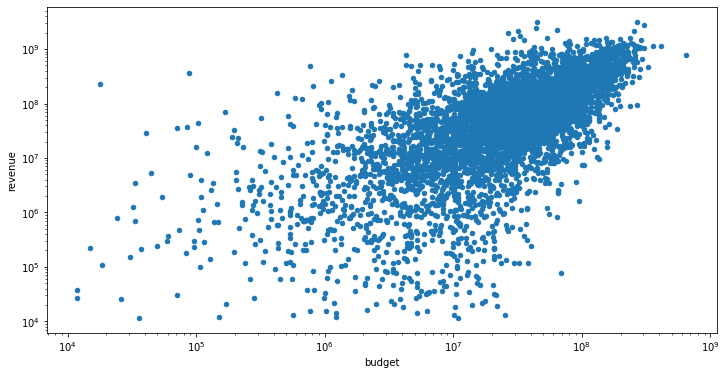

In [34]:
df.plot(x='budget', y='revenue', kind='scatter', figsize=(12, 6))
plt.yscale('log')
plt.xscale('log')
plt.show()

#### Расчет коэффицента Пирсона

In [22]:
corr_coef = np.corrcoef(df['budget'], df['revenue'])[0][1]
corr_coef

0.6092093806650382

Диаграмма и коэффициент Пирсона показывают, что корреляция между бюджетом фильма и выручкой имеется, но недостаточно высокая.

#### Расчет рентабельност (соотношение выручки к бюджету).

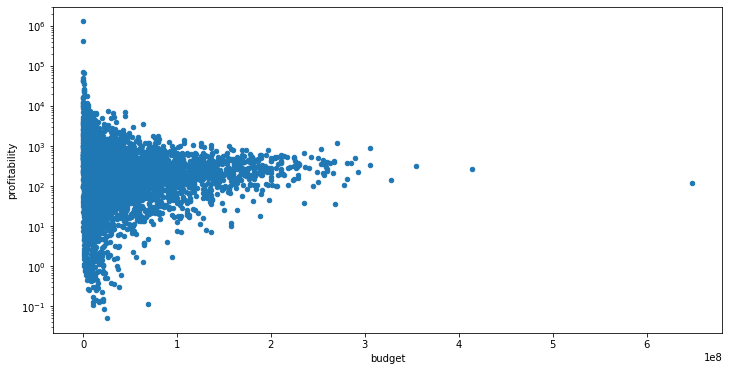

In [35]:
df.plot(x='budget', y='profitability', kind='scatter', figsize=(12, 6))
df['profitability'] = df['revenue'] / df['budget'] * 100
plt.yscale('log')
plt.show()

Из графика  видно, что рентабельность вложенных в производство фильма средств является высокой для низкобюджетных фильмов и уменьшается по мере увеличения бюджета фильма.

#### Вывод
Анализ показал, что высокий бюджет фильма не является достаточным основанием для хорошей выручки от фильма. Кроме того, снимать низкобюджетные фильмы более рентабельно, чем дорогие блокбастеры.